# Modelling and Evaluating

## Objectives

* The client is interested to tell wheterh a given leaf is covered with powdery mildew

## Inputs

* image shape embeddings (.pkl file)
* Images from the test, train, validation folders and their subfolders.

* inputs/cherryleaves_dataset/cherry-leaves/train
* inputs/cherryleaves_dataset/cherry-leaves/validation
* inputs/cherryleaves_dataset/cherry-leaves/test

## Outputs

* Plot the distribution of images across the train, validation, and test sets.
* Apply image augmentation techniques.
* Map class indices to modify prediction inference into labels.
* Create and train a machine learning model.
* Save the trained model.
* Plot the learning curve to visualize the model's performance.
* Model evaluation on .PKL file
* Prediction on the random image file

## Import packages

In [53]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

## Set working directory

In [54]:
cwd= os.getcwd()

In [55]:
os.chdir('/workspace/mildew-detector')
print("You set a new current directory")

You set a new current directory


In [56]:
work_dir = os.getcwd()
work_dir

'/workspace/mildew-detector'

## Set input directories

Set train, validation and test paths

In [57]:
my_data_dir = 'inputs/cherryleaves_dataset/cherry-leaves'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

## Set output directory

In [58]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(work_dir) and version in os.listdir(work_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path) 

Old version is already available create a new version.


## Set Labels

In [59]:
labels = os.listdir(train_path)
print(f'Image labels are: {labels}') 

Image labels are: ['healthy', 'powdery_mildew']


## Set image shape

In [60]:
import joblib
version = 'v1'
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape 

(256, 256, 3)

# Image Distrubtion

* train - healthy: 1472 images
* train - powdery_mildew: 1472 images
* validation - healthy: 210 images
* validation - powdery_mildew: 210 images
* test - healthy: 422 images
* test - powdery_mildew: 422 images




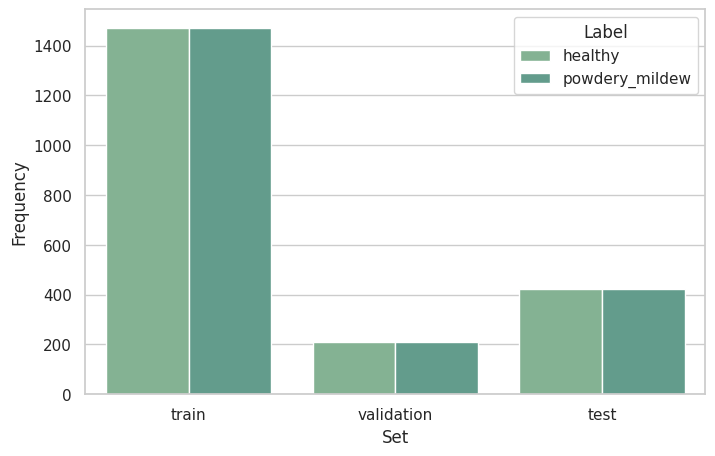

<Figure size 800x500 with 0 Axes>

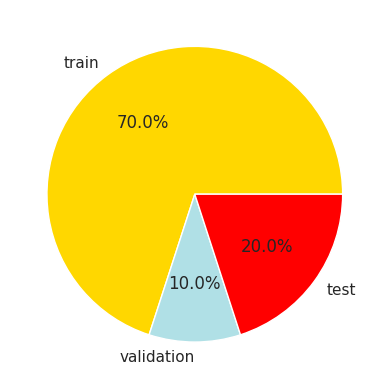

In [61]:
df_freq = pd.DataFrame([]) 
for folder in ['train', 'validation', 'test']:
  for label in labels:
    df_freq = df_freq.append(
        pd.Series(data={'Set': folder,
                        'Label': label,
                        'Frequency':int(len(os.listdir(my_data_dir+'/'+ folder + '/' + label)))}
                  ),
                  ignore_index=True
        )
    
    print(f"* {folder} - {label}: {len(os.listdir(my_data_dir+'/'+ folder + '/' + label))} images")

print("\n")
sns.set_theme(style="whitegrid", palette="crest") 
# sns.set_style("whitegrid") 
plt.figure(figsize=(8,5))
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label')   
plt.savefig(f'{file_path}/labels_distribution.png', bbox_inches='tight', dpi=150)
plt.show() 

plt.figure(figsize=(8,5))
labels = 'train', 'validation', 'test'
sizes = [70, 10, 20]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['gold', 'powderblue', 'red']) 
plt.savefig(f'{file_path}/labels_pie.png', bbox_inches='tight', dpi=150) 

# Image data augmentation

## Import ImageDataGenerator

In [62]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Initialize ImageDataGenerator

In [63]:
augmented_image_data = ImageDataGenerator(rotation_range=45,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          shear_range=0.2,
                                          zoom_range=0.2,
                                          channel_shift_range=50.0,
                                          horizontal_flip=True,
                                          vertical_flip=True,
                                          brightness_range=[0.5, 1.5],
                                          fill_mode='nearest',
                                          rescale=1./255
                                          )

## Augment training image dataset

### Set a Batch size

In [64]:
batch_size = 20

train_set = augmented_image_data.flow_from_directory(train_path,
                                                     target_size=image_shape[:2],
                                                     color_mode='rgb',
                                                     batch_size=batch_size,
                                                     class_mode='binary',
                                                     shuffle=True
                                                     )

train_set.class_indices 

Found 2944 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

## Augment validation image dataset

In [65]:
validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(val_path,
                                                                        target_size=image_shape[:2],
                                                                        color_mode='rgb',
                                                                        batch_size=batch_size,
                                                                        class_mode='binary',
                                                                        shuffle=False
                                                                        )

validation_set.class_indices 

Found 420 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

## Augment test image dataset

In [66]:
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path,
                                                                  target_size=image_shape[:2],
                                                                  color_mode='rgb',
                                                                  batch_size=batch_size,
                                                                  class_mode='binary',
                                                                  shuffle=False
                                                                  )

test_set.class_indices 

Found 844 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

## Plot augmented training image

(20, 256, 256, 3)


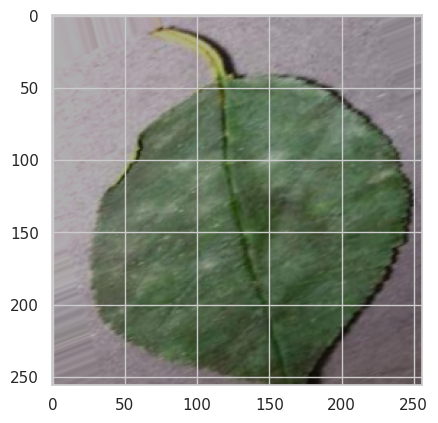

(20, 256, 256, 3)


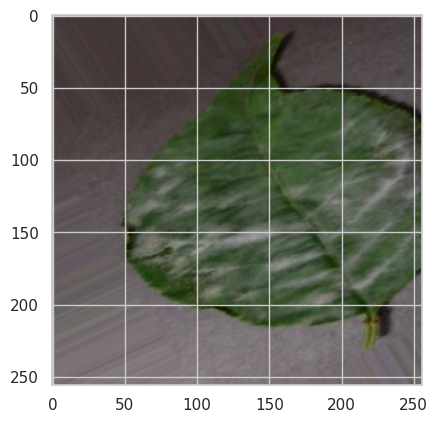

(20, 256, 256, 3)


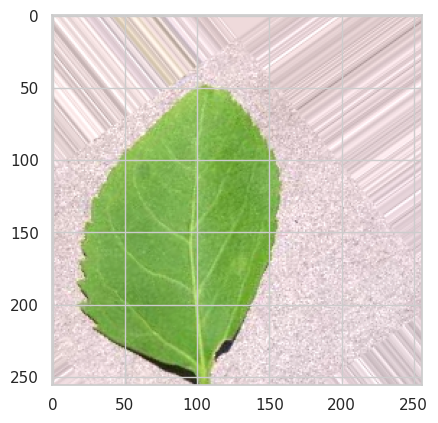

In [67]:
for _ in range(3):
    img, label = train_set.next()
    print(img.shape) 
    plt.imshow(img[0])
    plt.show()  

## Plot augmented validation and test images

(20, 256, 256, 3)


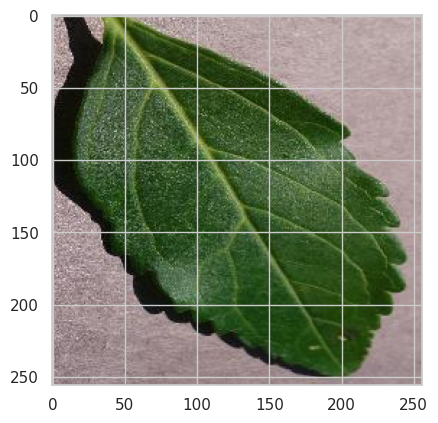

(20, 256, 256, 3)


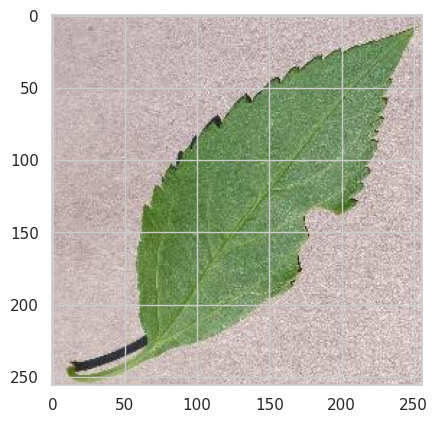

(20, 256, 256, 3)


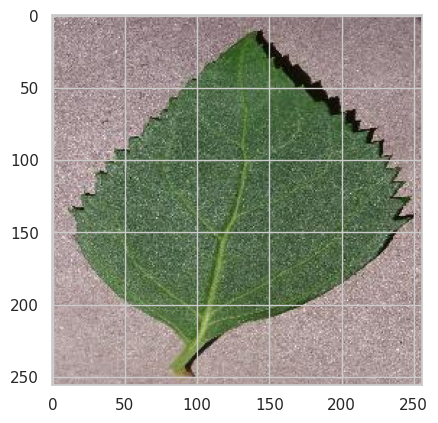

In [68]:
for _ in range(3):
    img, label = validation_set.next()
    print(img.shape)   
    plt.imshow(img[0])
    plt.show() 

(20, 256, 256, 3)


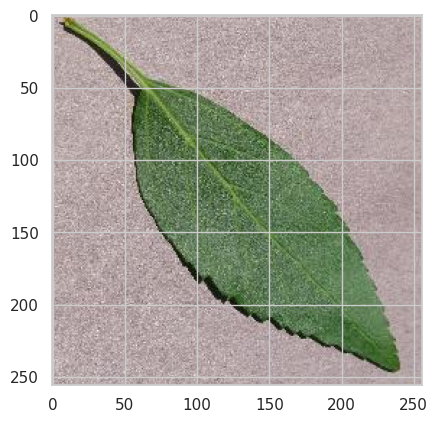

(20, 256, 256, 3)


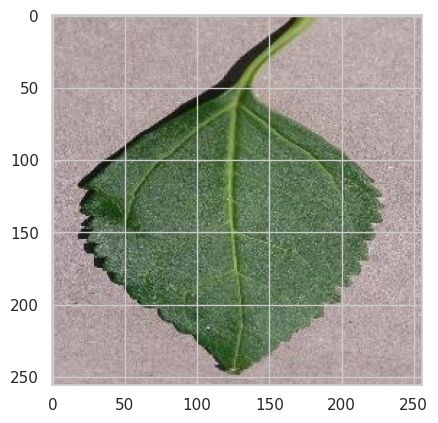

(20, 256, 256, 3)


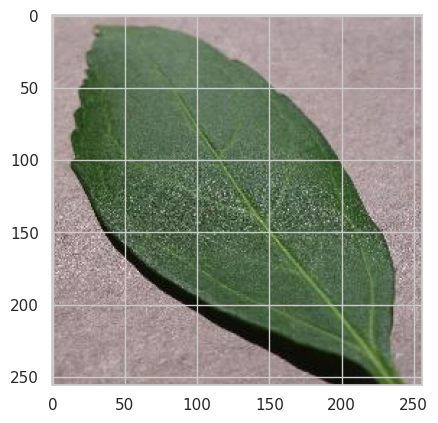

In [69]:
for _ in range(3):
    img, label = test_set.next()
    print(img.shape)  
    plt.imshow(img[0])
    plt.show()

## Save class_indices

In [70]:
joblib.dump(value=train_set.class_indices ,
            filename=f"{file_path}/class_indices.pkl") 

['outputs/v1/class_indices.pkl']

---

# Model creation

## Import model packages

In [81]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
from tensorflow.keras.regularizers import l1_l2

## Model

In [82]:
def image_tf_model():
    """
    Creates a binary classification tensorflow model
    Includes different layers and number of layers, filters,  
    activation functions and optimiser 
    """
    model = Sequential()
    # Input
    model.add(Conv2D(filters=16, kernel_size=(3, 3),
                     input_shape=image_shape, activation='relu',
                     kernel_regularizer=l1_l2(l1=0.001, l2=0.001)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=8, kernel_size=(3, 3),
                     input_shape=image_shape, activation='relu',
                     kernel_regularizer=l1_l2(l1=0.001, l2=0.001)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=32, kernel_size=(3, 3),
                     input_shape=image_shape, activation='relu',
                     kernel_regularizer=l1_l2(l1=0.001, l2=0.001)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    # Output
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

## Model Summary

In [83]:
image_tf_model().summary() 


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 125, 125, 8)       1160      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 62, 62, 8)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 60, 60, 32)        2336      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 28800)            

## Early Stopping

In [84]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)


## Fit model for training

In [85]:
model = image_tf_model() 
model.fit(train_set,
          epochs=10, 
          steps_per_epoch = len(train_set.classes) // batch_size,
          validation_data = validation_set,
          callbacks=[early_stop],
          verbose=1) 

Epoch 1/10
147/147 [==============================] - 57s 384ms/step - loss: 0.7433 - accuracy: 0.7541 - val_loss: 0.3386 - val_accuracy: 0.9619
Epoch 2/10
147/147 [==============================] - 51s 347ms/step - loss: 0.4970 - accuracy: 0.8731 - val_loss: 0.2793 - val_accuracy: 0.9929
Epoch 3/10
147/147 [==============================] - 57s 388ms/step - loss: 0.4110 - accuracy: 0.8974 - val_loss: 0.2091 - val_accuracy: 0.9762
Epoch 4/10
147/147 [==============================] - 50s 341ms/step - loss: 0.3313 - accuracy: 0.9313 - val_loss: 0.2080 - val_accuracy: 0.9690
Epoch 5/10
147/147 [==============================] - 45s 307ms/step - loss: 0.3077 - accuracy: 0.9343 - val_loss: 0.2368 - val_accuracy: 0.9571
Epoch 6/10
147/147 [==============================] - 45s 307ms/step - loss: 0.2540 - accuracy: 0.9531 - val_loss: 0.1351 - val_accuracy: 0.9976
Epoch 7/10
147/147 [==============================] - 45s 306ms/step - loss: 0.2742 - accuracy: 0.9456 - val_loss: 0.1396 - val_ac

## Save model

In [86]:
model.save('outputs/v1/mildew_detector_model.h5')

## Model Performance

### Model learning curve

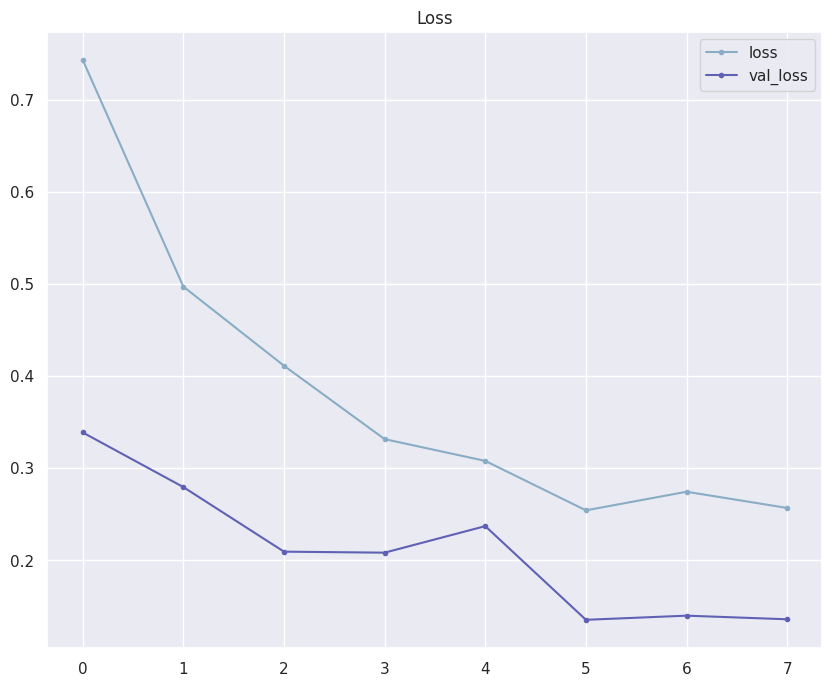

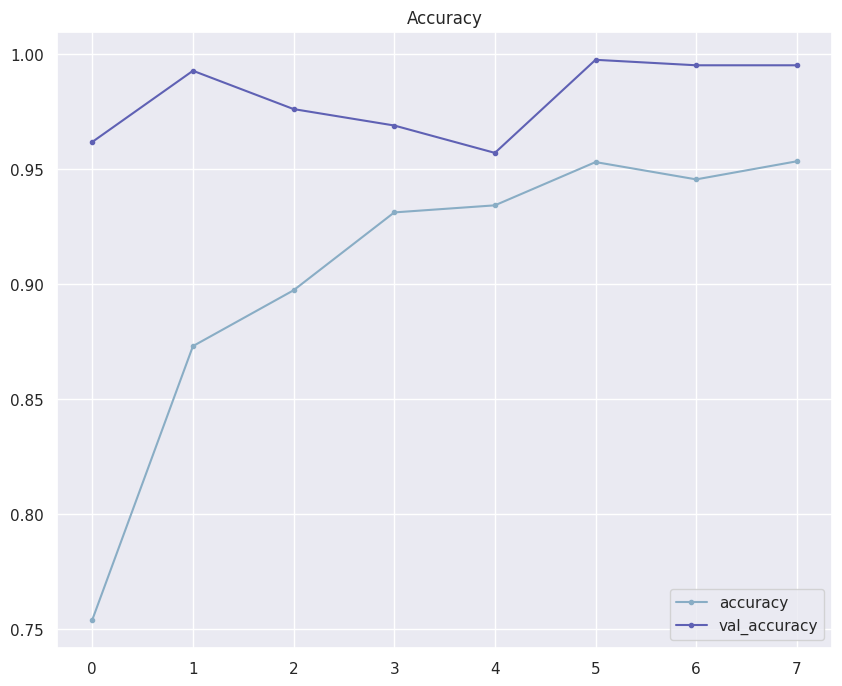

In [87]:
losses = pd.DataFrame(model.history.history)
plt.figure(figsize=(10, 8))

sns.set_theme(style="darkgrid", palette="twilight")
losses[['loss', 'val_loss']].plot(style='.-', ax=plt.gca())
plt.title("Loss")

plt.savefig(f'{file_path}/model_training_losses.png',
            bbox_inches='tight', dpi=150)

plt.figure(figsize=(10, 8))
losses[['accuracy', 'val_accuracy']].plot(style='.-', ax=plt.gca())
plt.title("Accuracy")

plt.savefig(f'{file_path}/model_training_acc.png',
            bbox_inches='tight', dpi=150)

plt.show()

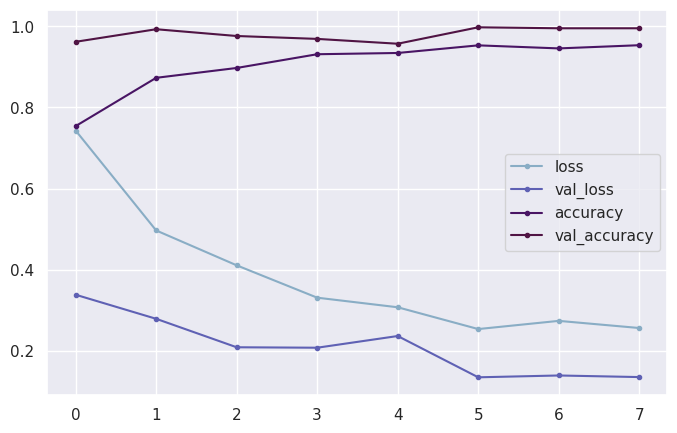

In [88]:
history_data = pd.DataFrame(model.history.history)
plt.figure(figsize=(8, 5))


columns_to_plot = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
history_data[columns_to_plot].plot(ax=plt.gca(), style='.-', figsize=(8, 5))


plt.savefig(f'{file_path}/model_loss_acc.png',
            bbox_inches='tight', dpi=150)
plt.show()

## Model Evaluation

### Import saved model

In [89]:
from keras.models import load_model
model = load_model('outputs/v1/mildew_detector_model.h5')

## Evaluate model on test set

In [90]:
evaluation = model.evaluate(test_set, batch_size=batch_size)
print("Model accuracy: " + "{:.2f}%".format(evaluation[1] * 100))
print("Model Loss: " + str(evaluation[0]))


43/43 [==============================] - 2s 47ms/step - loss: 0.1222 - accuracy: 0.9976
Model accuracy: 99.76%
Model Loss: 0.12215182185173035


## Save evaluation PKL

In [91]:
joblib.dump(value=evaluation,
            filename=f"outputs/v1/evaluation.pkl")

['outputs/v1/evaluation.pkl']

# Predict on new data

Load random image as PIL

In [92]:
from tensorflow.keras.preprocessing import image
import os

pointer = 34
label = labels[1] # select 0 for 'healthy' or 1 for 'powdery_mildew'

pil_image = image.load_img(test_path + '/' + label + '/' + os.listdir(test_path+'/' + label)[pointer],
                           target_size=image_shape, color_mode='rgb')
print(f'Image shape: {pil_image.size}, Image mode: {pil_image.mode}')
pil_image

FileNotFoundError: [Errno 2] No such file or directory: 'inputs/cherryleaves_dataset/cherry-leaves/test/validation'

### Convert image to array and prepare for prediction

In [93]:
my_image = image.img_to_array(pil_image)
my_image = np.expand_dims(my_image, axis=0)
print(my_image.shape)

NameError: name 'pil_image' is not defined

### Predict class probabilities

In [71]:
pred_proba = model.predict(my_image)[0,0]  


target_map = {v: k for k, v in train_set.class_indices.items()}


pred_class_index = int(pred_proba > 0.5)  
pred_class = target_map[pred_class_index]  

if pred_class == target_map[0]:  
    print("Status: Healthy")
else:  
    print("Status: Infected")

print(f"{pred_class} {round(pred_proba*100, 2)}%")

Status: Infected
powdery_mildew 100.0%
